# Homework 6: Correlations.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [135]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

# 1. Ever Upwards

You are part of a team aiming to predict future costs for a coffee shop,
and are given the following model.
Let $X_0 = \$1.50$ be the price (to the shop) of a cup of coffee today,
and model the price $n$ weeks from now as $X_n = X_{n-1} + Z_n$,
where each $Z_n$ has a Normal distribution with mean \\$0.10 and standard deviation \\$0.10,
and is independent of other $Z$.
We want to see how well we can predict prices for the next 10 weeks under this model.

*(a)* If we define $Z = (Z_1, Z_2, \ldots, Z_{10})$,
    and $X = (X_1, X_2, \ldots, X_{10})$,
    then we can write $X = X_0 + AZ$ for some matrix $Z$.
    What is that matrix?

*(b)* What is the mean and covariance matrix of $X$?
    Explain, and check by simulation.

**(a)** The matrix $A$ 

In [136]:
A = np.tril(np.ones((10, 10)))
print(A)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


**(b)** Mean and covariance matrix of $X$

In [137]:
X0 = 1.50
mean = 0.10
sd = 0.10


mean_vector = mean * np.ones(10)
mean_X = X0 + A @ mean_vector

cov_X = (sd ** 2) * (A @ A.T)

print("\nMean vector of X:")
print(mean_X)

print("\nCovariance matrix of X:")
print(cov_X)


Mean vector of X:
[1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]

Covariance matrix of X:
[[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]
 [0.01 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03]
 [0.01 0.02 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04]
 [0.01 0.02 0.03 0.04 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.01 0.02 0.03 0.04 0.05 0.06 0.06 0.06 0.06 0.06]
 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.07 0.07 0.07]
 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.08 0.08]
 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.09]
 [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]]


# 2. Books by a different name

In class, we did PCA on word count data from passages from three books. The passages are in the file [data/passages.txt](https://uodsci.github.io/dsci345/class_material/fall_2022/homeworks/data/passages.txt) and the sources of each passage are in [data/passage_sources.tsv](https://uodsci.github.io/dsci345/class_material/fall_2022/homeworks/data/passage_sources.tsv). Repeat the analysis. You may use the same code from class to read in and process the data,
but you should *use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)* to do the PCA.  Your results should be similar but not the same as those from class, since scikit-learn's implementation differs somewhat. Also, you don't need to show everything that we did in class
(use your judgement) but we encourage you to explore.

*Note:* part of this question is to figure out how what another method gives you maps on to what we discussed in class. Big clues are provided by the sizes of various outputs.

In [191]:
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.sparse.linalg import svds

pfile = open("passages.txt", "r")
passages = pfile.read().split("\n")
sources = pd.read_table("passage_sources.tsv")
words = np.unique(" ".join(passages).split(" "))[1:]
def tabwords(x, words):
    d = defaultdict(int)
    for w in x.split(" "):
        d[w] += 1
    out = np.array([d[w] for w in words])
    return out

wordmat = np.array([tabwords(x, words) for x in passages])

In [192]:
x = wordmat - np.mean(wordmat, axis=1)[:,np.newaxis]
x /= np.std(x, axis=1)[:, np.newaxis]
pcs, evals, evecs = svds(x, k=4)
eord = np.argsort(evals)[::-1]
evals = evals[eord]
evecs = evecs[eord,:]
pcs = pcs[:,eord]

In [193]:
loadings = pd.DataFrame(evecs.T, columns=[f"PC{k}" for k in range(1,5)], index=words)
loadings

,PC1,PC2,PC3,PC4
a,0.200411,0.037499,0.055687,-0.062291
aback,-0.000536,0.000239,-0.000244,-0.000006
abaft,-0.000554,0.000167,-0.000109,0.000107
abandon,-0.000514,0.000292,0.000012,0.000323
abandoned,-0.000394,0.000976,-0.000132,-0.000126
...,...,...,...,...
zephyr,-0.000553,0.000176,-0.000067,0.000112
zodiac,-0.000460,0.000522,0.000393,0.000485
zone,-0.000406,0.000765,0.000035,-0.000451
zones,-0.000505,0.000423,0.000012,0.000514


In [194]:
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(wordmat)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

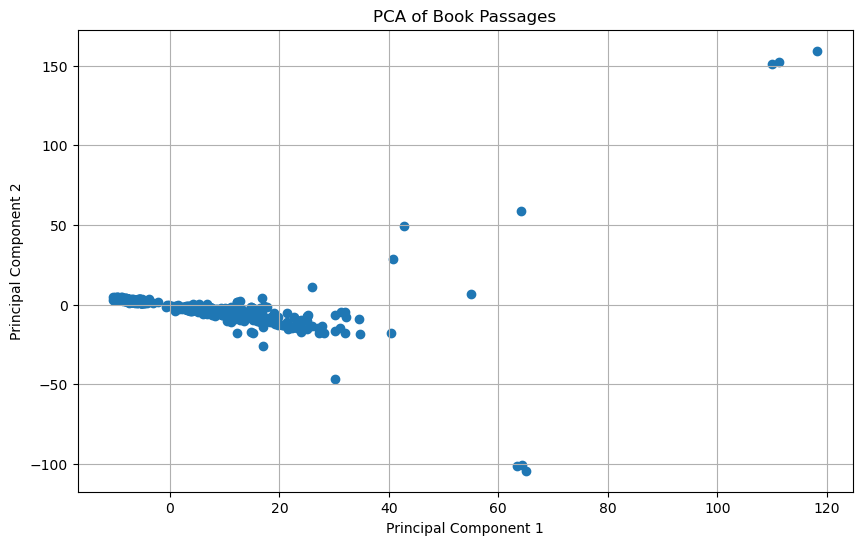

In [195]:
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Source': sources['source']
})

plt.figure(figsize=(10, 6))
plt.scatter(data=pca_df, x='PC1', y='PC2')
plt.title("PCA of Book Passages")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# 3. The Matrix

The secret vault can only be unlocked by a stream of numbers satisfying certain statistical properties.
You can pass in 5 floating-point numbers at a time,
and each set of 5 must be related to eachother in the following way:
they should be Normally distributed with mean zero and the ($5 \times 5$) covariance matrix:
$$\begin{aligned}
    M_{ij} = (1+i+j) 2^{-|i-j|} \qquad \text{for } 1 \le j \le 5, \quad 1 \le i \le 5 .
\end{aligned}$$
Write a function to produce a random set of 5 numbers of this form,
and test the result by verifying that (a) $\text{var}[X_2] = 3$ and
(b) $\text{cov}[X_3,X_5] = 1.75$.

In [158]:
def construct_cov_matrix(n=5):
    M = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            M[i, j] = (1 + i + j) * (2 ** (-abs(i - j)))
    return M

def generate_sample(M, size=1):
    mean = np.zeros(M.shape[0])
    return np.random.multivariate_normal(mean, M, size=size)

def test_sample_properties(samples):
    empirical_cov = np.cov(samples, rowvar=False)
    var_X2 = empirical_cov[1, 1]
    cov_X3_X5 = empirical_cov[2, 4]
    return var_X2, cov_X3_X5, empirical_cov

M = construct_cov_matrix()
samples = generate_sample(M, size=100000)
var_X2, cov_X3_X5, empirical_cov = test_sample_properties(samples)

print(f"Estimated Var(X2): {var_X2:.4f} (expected 3)")
print(f"Estimated Cov(X3, X5): {cov_X3_X5:.4f} (expected 1.75)")

Estimated Var(X2): 3.0095 (expected 3)
Estimated Cov(X3, X5): 1.7494 (expected 1.75)
